# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Learn about PyTorch DataLoaders and how to build your own on a custom dataset.

b) Learn how to train and evaluate a convolutional neural network.



#**Q1 DataLoaders**

#Connect your drive account

In order to upload the numpy files of the given folder, you can use the ‘drive’ package from google.colab library like this:

- from google.colab import drive

Then, you define the destination of your Drive account like this:

- drive=drive.mount('/content/drive')

Finally, you can load files from the given folder in this way:

- arr_train_labels=np.load('drive/.._folderdestination_../train_labels.npy')

In [37]:
import numpy as np
import pandas as pd
from google.colab import drive

drive = drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load train, test and validation label arrays
##here put your custom destination folder
# *****START CODE
train_images = np.load('train_images.npy')
val_images = np.load('val_images.npy')

train_labels = np.load('train_labels.npy')
val_labels = np.load('val_labels.npy')
# *****END CODE

In [ ]:
print('train images', train_images.shape)
print('val images', val_images.shape)
print('train labels', train_labels.shape)
print('val labels', val_labels.shape)

train images (5000, 1, 28, 28)
val images (1000, 1, 28, 28)
train labels (5000,)
val labels (1000,)


Print a random training image.

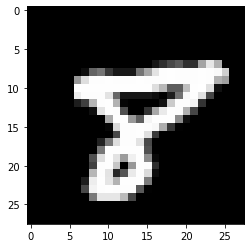

In [ ]:
from matplotlib import pyplot as plt

##print a random image
# *****START CODE
plt.imshow(train_images[0][0], cmap='gray')

# *****END CODE

Print the corresponding label for the image that you printed.

In [ ]:
##print the corresponding label
# *****START CODE
print(train_labels[10])
# *****END CODE

9


Iterate through the training images using a for loop and a batchsize of 10

In [ ]:
# *****START CODE
batchsize = 10



# *****END CODE    

#Example: PyTorch DataLoader for MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms 

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

#uploading the standard dataset as it is 
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
#maintains a list / dictionary that will be shuffled , doesn't shuffle the whole tensor but the other representation of it (list/dictionary) - to expensive to shuffle the tensor 
val_loader = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(train_loader):
        data, target = batch
        print('data', data.shape)
        print('target', target.shape)

data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28]

#Familiarize with .csv files

Create a csv file for the following table:

| Name         | Surname        | Gender | 
| ------------ | ------------ | ------- | 
| Mary         | Smith        | Female       |
| James        | Williams     | Male     | 
| Sarah        | Martin       | Female      | 
| Peter        | Miller       | Male     | 

In [ ]:
import pandas as pd

names = ['Mary', 'James', 'Sarah', 'Peter']
surnames = ['Smith', 'Williams', 'Martin', 'Miller']
genders = ['Female', 'Male', 'Female', 'Male']

df = pd.DataFrame({'Name': names ,
                       'Surname': surnames ,
                       'Gender': genders ,
                      })

# *****START CODE
##save .csv file
df.to_csv('toy.csv', index=False, columns = ['Name', 'Surname', 'Gender'])

In [ ]:
##read .csv file
toy_file = pd.read_csv('toy.csv')
# *****END CODE

In [ ]:
##print .csv file
# *****START CODE
toy=toy_file
#Very opt
# *****END CODE

Use iloc command from pandas library to access specific .csv items

In [ ]:
##show first column
toy.iloc[:,0]

0     Mary
1    James
2    Sarah
3    Peter
Name: Name, dtype: object

In [ ]:
##show second row
# *****START CODE
toy.iloc[0].Surname
# *****END CODE

'Smith'

In [ ]:
##show element in first row and second column
# *****START CODE


# *****END CODE

#Create your own custom DataLoader

Use the numpy files to define your own custom dataloader.

a) First create and save a .csv file with 2 columns:

- ‘image_ID’, which involves the image index locations
- ‘labels’, which involves the corresponding label for every image index

Create 2 .csv files; one for the training arrays and one for the validation arrays.

In [ ]:
##create training .csv file
# *****START CODE
#Create a csv with two columns id and labels with the file name of images (the full path of images)

df=pd.DataFrame(enumerate(train_labels), columns=['image_ID', 'labels'])

df
#want to save this now 
df.to_csv(/)

# *****END CODE

,image_ID,labels
0,0,8
1,1,5
2,2,6
3,3,4
4,4,6
...,...,...
4995,4995,3
4996,4996,4
4997,4997,1
4998,4998,1


In [ ]:
##create validation .csv file
# *****START CODE



# *****END CODE

b) Now create your own custom dataloader. When building a custom dataloader, it is necessary to define a class which involves 3 required functions:

- __init__, for the class initialization

- __getitem__, for data extraction according to given indexes

-  __len__, for calculating the total number of data samples

In [ ]:
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path, images_file):
        ## Read the csv file with pandas library
        # *****START CODE
        self.data_info = 
        
        ##Load the numpy array of images
        self.images = 
        # *****END CODE
        
    def __getitem__(self, index):
        ## Get the image-label set using the given index
        ## Hint: use iloc command from pandas library
        # *****START CODE
        image_id = 
        image = 
        label = 
        # *****END CODE
        ## bring all image spectral values to the range of [0,1]
        image = image/255.0

        return image, label

    def __len__(self):
        ## return the total number of data samples
        return len(self.data_info)

c) Call the dataloader for both the training and the validation sets

In [ ]:
from torch.utils.data import DataLoader

## training and validation .csv paths
##here put your custom destination folder
train_csv_file = 'drive/.../train.csv'
val_csv_file = 'drive/.../val.csv'

## paths for training and validation numpy array images
##here put your custom destination folder
train_images_file = 'drive/..../train_images.npy'
val_images_file = 'drive/..../val_images.npy'

## define and create training and validation dataloaders using MyDataset (fill the blanks)
# *****START CODE
## define and create training and validation dataloaders using MyDataset (fill the blanks)
train_dataset = MyDataset( , )
val_dataset = MyDataset( , )

train_dataloader = DataLoader(  )
val_dataloader = DataLoader(  )
# *****END CODE

Iterate through your dataloader using a for loop.

In [ ]:
# *****START CODE


# *****END CODE

#**Q2 Classification problem**

Define your custom convolutional neural network.

In [ ]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 32, 3, 1) #W2=(W1−F+2P)/S+1
        ##define a second convolutional layer, which outputs 64 channels
        # *****START CODE

        # *****END CODE
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        ##create the last two fully connected layers
        # *****START CODE


        # *****END CODE

##define the forward propagation of the data
##conv1--relu--conv2--maxpool--dropout1--fc1--dropout2--fc2
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2) #W2=(W1−F)/S+1
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        # *****START CODE



         # *****END CODE       

        output = x  #F.log_softmax(x, dim=1)
        return output

In [ ]:
# define model
# *****START CODE

# *****END CODE

In [ ]:
import torch
# define optimizer, criterion and number of training epochs
# *****START CODE



# *****END CODE

In [ ]:
!pip install torchnet
import torchnet as tnt

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

In [ ]:
# create a directory for saving the models and the training progress
save_folder = 'drive/..../models/'

In [ ]:
##function which saves the overall accuracy and average loss at the end of each epoch,
##both for the training and the validation set
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    ff=open('./{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write(' TRAIN_OA: ')
    ff.write(str('%.3f' % train_acc))
    ff.write(' VAL_OA: ')
    ff.write(str('%.3f' % val_acc))
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')

In [ ]:
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

In [ ]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []


for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE




        # *****END CODE

        train_losses.append(loss.item())
        confusion_matrix.add(output.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()

     ##VALIDATION##
    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE


        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)
    confusion_matrix.reset()

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + 'model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)



Test the trained model.

In [ ]:
test_images_file = 'drive/..../test_images.npy'
test_labels_file = 'drive/..../test_labels.npy'

##load the test images and the test labels
# *****START CODE
images = np.load(test_images_file)
labels = np.load(test_labels_file)
# *****END CODE

##define the model, load it and put it in evaluation mode
# *****START CODE



# *****END CODE

confusion_matrix = tnt.meter.ConfusionMeter(10) 
confusion_matrix.reset()


for i in range(0, len(images)):
    ##rad each image, normalize it, convert it to a pytorch tensor of type float
    # *****START CODE




    # *****END CODE

    ##produce the model prediction
    # *****START CODE

    # *****END CODE

    confusion_matrix.add(output.data, label.long())

print(confusion_matrix.conf)

Plot the first six testing images along with their true labels.

In [ ]:
##plot the testing images
# *****START CODE
plt.figure(figsize=(10,6))
n_images = 6
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  one_image = images[i, 0, :, :]
  one_title = labels[i]
  plt.imshow(one_image,cmap='gray')
  plt.title(one_title);
 # *****END CODE 

Print the model's predicted labels for the above images.

In [ ]:
##print the predicted labels for the above images
# *****START CODE
for i in range(n_images):
    img = images[i]
    img = img/255.0 #normalization
    img = np.expand_dims(img,0)#reshape to (batchsize x channels x height x width)
    img = torch.from_numpy(img)
    output = F.log_softmax(model(img.float()),1)
    output = torch.argmax(output)
    print(output)
# *****END CODE